In [1]:
#importing import necessary libraires

In [2]:
import numpy as np
import pandas as pd
import numpy as np # for data manipulation
import pandas as pd # for data manipulation
import seaborn as sns# for data visulaization
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split # will be used for data split
from sklearn.preprocessing import LabelEncoder # for preprocessing
from sklearn.tree import DecisionTreeClassifier # for training the Machine learnng Algorithm
from sklearn.ensemble import RandomForestClassifier
import joblib # for saving algorithm and preprocessing objects
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import seaborn as sns
import pickle
%matplotlib inline

In [3]:
import os
os.getcwd()

'C:\\Users\\Hp\\Desktop\\Machine learning Model for Malaria Diagnosis'

In [4]:

df = pd.read_csv("knowledge base for Expert system.csv",index_col = 0)


In [5]:
df.head(10)

,Fever,Headache,Nausea,Vomiting,Jaundice,Enlarged Liver,Joint Pain,Body Weakness,Dizziness,Loss of Appetite,Mp,diagnosis
0,0.75,0.50,0.50,0.25,0.25,0.50,0.25,0.25,0.75,0.75,0.50,Severe
1,0.50,0.25,0.50,0.50,0.50,0.25,0.75,0.50,0.50,0.75,0.25,Mild
2,0.75,0.50,0.50,0.50,0.50,0.50,0.50,0.25,0.25,0.50,0.25,Moderate
3,0.00,0.25,0.50,0.25,0.25,0.00,0.50,0.00,0.25,0.50,0.50,Very Severe
4,0.50,0.00,0.25,0.25,0.50,0.00,0.25,0.25,0.00,0.25,0.25,Very Severe
5,0.50,0.50,0.50,0.25,0.50,0.25,0.00,0.50,0.50,0.25,0.25,Moderate
6,0.50,0.25,0.25,0.25,0.00,0.50,0.25,0.25,0.75,0.25,0.25,Moderate
7,0.25,0.25,0.50,0.50,0.25,0.25,0.25,0.75,0.75,0.00,0.50,Mild
8,0.25,0.00,0.25,0.50,0.00,0.50,0.00,0.50,0.50,0.25,0.25,Moderate
9,0.00,0.50,0.25,0.25,0.25,0.25,0.25,0.50,0.50,0.50,0.25,Severe


In [6]:
df.shape

(499, 12)

In [7]:
df.isnull().sum()

Fever               0
Headache            0
Nausea              0
Vomiting            0
Jaundice            0
Enlarged Liver      0
Joint Pain          0
Body Weakness       0
Dizziness           0
Loss of Appetite    0
Mp                  0
diagnosis           0
dtype: int64

In [8]:
df.head(10)

,Fever,Headache,Nausea,Vomiting,Jaundice,Enlarged Liver,Joint Pain,Body Weakness,Dizziness,Loss of Appetite,Mp,diagnosis
0,0.75,0.50,0.50,0.25,0.25,0.50,0.25,0.25,0.75,0.75,0.50,Severe
1,0.50,0.25,0.50,0.50,0.50,0.25,0.75,0.50,0.50,0.75,0.25,Mild
2,0.75,0.50,0.50,0.50,0.50,0.50,0.50,0.25,0.25,0.50,0.25,Moderate
3,0.00,0.25,0.50,0.25,0.25,0.00,0.50,0.00,0.25,0.50,0.50,Very Severe
4,0.50,0.00,0.25,0.25,0.50,0.00,0.25,0.25,0.00,0.25,0.25,Very Severe
5,0.50,0.50,0.50,0.25,0.50,0.25,0.00,0.50,0.50,0.25,0.25,Moderate
6,0.50,0.25,0.25,0.25,0.00,0.50,0.25,0.25,0.75,0.25,0.25,Moderate
7,0.25,0.25,0.50,0.50,0.25,0.25,0.25,0.75,0.75,0.00,0.50,Mild
8,0.25,0.00,0.25,0.50,0.00,0.50,0.00,0.50,0.50,0.25,0.25,Moderate
9,0.00,0.50,0.25,0.25,0.25,0.25,0.25,0.50,0.50,0.50,0.25,Severe


In [9]:
#get Info on the dataset to be used

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 498
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fever             499 non-null    float64
 1   Headache          499 non-null    float64
 2   Nausea            499 non-null    float64
 3   Vomiting          499 non-null    float64
 4   Jaundice          499 non-null    float64
 5   Enlarged Liver    499 non-null    float64
 6   Joint Pain        499 non-null    float64
 7   Body Weakness     499 non-null    float64
 8   Dizziness         499 non-null    float64
 9   Loss of Appetite  499 non-null    float64
 10  Mp                499 non-null    float64
 11  diagnosis         499 non-null    object 
dtypes: float64(11), object(1)
memory usage: 50.7+ KB


In [11]:
df.describe()

,Fever,Headache,Nausea,Vomiting,Jaundice,Enlarged Liver,Joint Pain,Body Weakness,Dizziness,Loss of Appetite,Mp
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.00000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,0.445892,0.455912,0.448397,0.356212,0.273547,0.27505,0.376253,0.370741,0.408317,0.413327,0.377756
std,0.269012,0.480347,0.635873,0.182688,0.183593,0.18712,0.204964,0.216247,0.213702,0.214035,0.148912
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.250000
25%,0.250000,0.250000,0.250000,0.250000,0.250000,0.25000,0.250000,0.250000,0.250000,0.250000,0.250000
50%,0.500000,0.250000,0.250000,0.250000,0.250000,0.25000,0.250000,0.250000,0.500000,0.500000,0.250000
75%,0.750000,0.500000,0.500000,0.500000,0.500000,0.25000,0.500000,0.500000,0.500000,0.500000,0.500000
max,0.750000,3.000000,4.000000,0.750000,0.500000,0.75000,0.750000,0.750000,0.750000,0.750000,0.750000


In [12]:
df

,Fever,Headache,Nausea,Vomiting,Jaundice,Enlarged Liver,Joint Pain,Body Weakness,Dizziness,Loss of Appetite,Mp,diagnosis
0,0.75,0.50,0.50,0.25,0.25,0.50,0.25,0.25,0.75,0.75,0.50,Severe
1,0.50,0.25,0.50,0.50,0.50,0.25,0.75,0.50,0.50,0.75,0.25,Mild
2,0.75,0.50,0.50,0.50,0.50,0.50,0.50,0.25,0.25,0.50,0.25,Moderate
3,0.00,0.25,0.50,0.25,0.25,0.00,0.50,0.00,0.25,0.50,0.50,Very Severe
4,0.50,0.00,0.25,0.25,0.50,0.00,0.25,0.25,0.00,0.25,0.25,Very Severe
...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.50,0.25,0.25,0.25,0.00,0.50,0.25,0.25,0.75,0.25,0.25,Moderate
495,0.25,0.25,0.50,0.50,0.25,0.25,0.25,0.75,0.75,0.00,0.50,Mild
496,0.25,0.00,0.25,0.50,0.00,0.50,0.00,0.50,0.50,0.25,0.25,Moderate
497,0.00,0.50,0.25,0.25,0.25,0.25,0.25,0.50,0.50,0.50,0.25,Severe


In [13]:
df["diagnosis"].value_counts()

Moderate       214
Severe         197
Very Severe     48
Mild            40
Name: diagnosis, dtype: int64

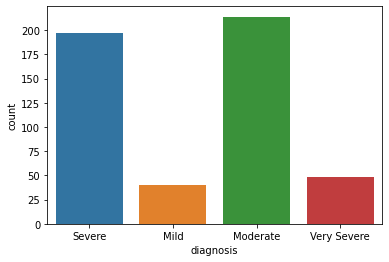

In [14]:
sns.countplot(df["diagnosis"])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 498
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fever             499 non-null    float64
 1   Headache          499 non-null    float64
 2   Nausea            499 non-null    float64
 3   Vomiting          499 non-null    float64
 4   Jaundice          499 non-null    float64
 5   Enlarged Liver    499 non-null    float64
 6   Joint Pain        499 non-null    float64
 7   Body Weakness     499 non-null    float64
 8   Dizziness         499 non-null    float64
 9   Loss of Appetite  499 non-null    float64
 10  Mp                499 non-null    float64
 11  diagnosis         499 non-null    object 
dtypes: float64(11), object(1)
memory usage: 70.7+ KB


In [16]:
#set input and target variables

In [17]:
x_target = df.drop("diagnosis", axis = 1)

In [18]:
x_target.shape


(499, 11)

In [19]:
y_target = df["diagnosis"]

In [20]:
y_target.shape

(499,)

In [21]:
#training and testing of your model

In [22]:
#splitting your dataset into train and split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x_target ,y_target, test_size = 0.3, random_state = 42)

In [24]:
#Applying Standard scaling to get optimized result


In [25]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(349, 11)
(150, 11)
(349,)
(150,)


# Random Forest Machine Learning Model

In [27]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [28]:
#Let's see how our model performed


In [29]:
print("ACCURACY SCORE:\n")
print(accuracy_score(y_test, pred_rfc),"\n")
print("CLASSIFICATION REPORT:\n")
print(classification_report(y_test,pred_rfc))
print("CONFUSION MATRIX:\n")
print(confusion_matrix(y_test,pred_rfc))
RT_score = accuracy_score(y_test, pred_rfc) 

ACCURACY SCORE:

1.0 

CLASSIFICATION REPORT:

              precision    recall  f1-score   support

        Mild       1.00      1.00      1.00        11
    Moderate       1.00      1.00      1.00        67
      Severe       1.00      1.00      1.00        58
 Very Severe       1.00      1.00      1.00        14

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

CONFUSION MATRIX:

[[11  0  0  0]
 [ 0 67  0  0]
 [ 0  0 58  0]
 [ 0  0  0 14]]


# Model evaluation using Confusion Matrix

In [30]:
cfn_matrix = metrics.confusion_matrix(y_test, pred_rfc) 

# Visualizing Confusion Matrix using Heatmap

Text(0.5, 257.44, 'Predicted label')

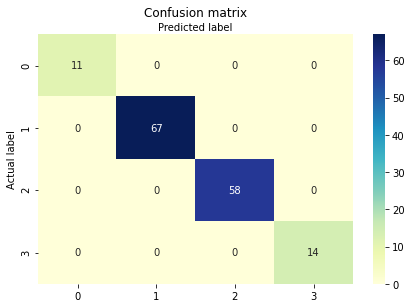

In [31]:
class_names=[0,1] # name  of classes 

fig, ax = plt.subplots() 

tick_marks = np.arange(len(class_names)) 

plt.xticks(tick_marks, class_names) 

plt.yticks(tick_marks, class_names) 

# create heatmap 

sns.heatmap(pd.DataFrame(cfn_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 

ax.xaxis.set_label_position("top") 

plt.tight_layout() 

plt.title('Confusion matrix', y=1.1) 

plt.ylabel('Actual label') 

plt.xlabel('Predicted label')

In [32]:
#now we test our model with a new set of data inputs

In [33]:
Xnew = [[0.50, 0.25, 0.25, 0.50, 0.25, 0.25, 0.75, 0.50, 0.50, 0.75, 0.25]]
Xnew = sc.transform(Xnew)
ynew = rfc.predict(Xnew) 
print(ynew)

['Mild']


# LOGISTIC REGRESSION MACHINE LEARNING MODEL


In [34]:
# instantiate the model 

logreg =  LogisticRegression(solver='liblinear') 

In [35]:
# fit the model with data 

logreg.fit(X_train,y_train) 

LogisticRegression(solver='liblinear')

In [36]:
# predicting 

y_pred=logreg.predict(X_test) 

In [37]:
print("ACCURACY SCORE:\n")
print(accuracy_score(y_test, y_pred),"\n")
print("CLASSIFICATION REPORT:\n")
print(classification_report(y_test,y_pred))
print("CONFUSION MATRIX:\n")
print(confusion_matrix(y_test,y_pred))
LR_Score = accuracy_score(y_test, y_pred)



ACCURACY SCORE:

0.7133333333333334 

CLASSIFICATION REPORT:

              precision    recall  f1-score   support

        Mild       1.00      0.64      0.78        11
    Moderate       0.68      0.69      0.68        67
      Severe       0.66      0.69      0.67        58
 Very Severe       1.00      1.00      1.00        14

    accuracy                           0.71       150
   macro avg       0.83      0.75      0.78       150
weighted avg       0.72      0.71      0.71       150

CONFUSION MATRIX:

[[ 7  4  0  0]
 [ 0 46 21  0]
 [ 0 18 40  0]
 [ 0  0  0 14]]


# Model evaluation using Confusion Matrix

In [38]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 

# Visualizing Confusion Matrix using Heatmap

Text(0.5, 257.44, 'Predicted label')

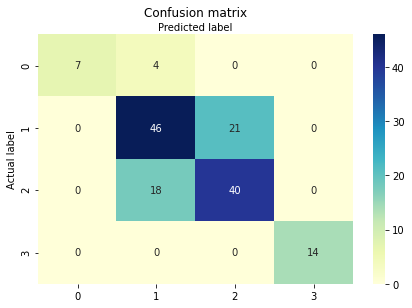

In [39]:
class_names=[0,1] # name  of classes 

fig, ax = plt.subplots() 

tick_marks = np.arange(len(class_names)) 

plt.xticks(tick_marks, class_names) 

plt.yticks(tick_marks, class_names) 

# create heatmap 

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 

ax.xaxis.set_label_position("top") 

plt.tight_layout() 

plt.title('Confusion matrix', y=1.1) 

plt.ylabel('Actual label') 

plt.xlabel('Predicted label')

# k Nearest Neighbours Machine learning model

In [40]:
neighbours = KNeighborsClassifier(n_neighbors=3)

In [41]:
#Fit the model
neighbours.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
k_pred = neighbours.predict(X_test)

In [43]:
print("ACCURACY SCORE:\n")
print(accuracy_score(y_test, k_pred),"\n")
print("CLASSIFICATION REPORT:\n")
print(classification_report(y_test,k_pred))
print("CONFUSION MATRIX:\n")
print(confusion_matrix(y_test,k_pred))
KNN_Score = accuracy_score(y_test, k_pred)

ACCURACY SCORE:

1.0 

CLASSIFICATION REPORT:

              precision    recall  f1-score   support

        Mild       1.00      1.00      1.00        11
    Moderate       1.00      1.00      1.00        67
      Severe       1.00      1.00      1.00        58
 Very Severe       1.00      1.00      1.00        14

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

CONFUSION MATRIX:

[[11  0  0  0]
 [ 0 67  0  0]
 [ 0  0 58  0]
 [ 0  0  0 14]]


# Model evaluation using Confusion Matrix

In [44]:
cnf_matrix = metrics.confusion_matrix(y_test, k_pred)

# Visualizing Confusion Matrix using Heatmap

Text(0.5, 257.44, 'Predicted label')

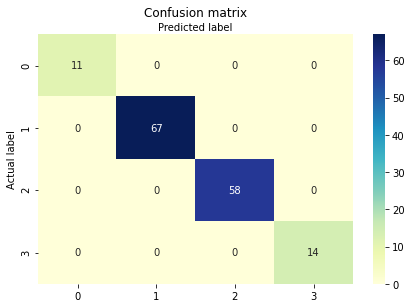

In [45]:
class_names=[0,1] # name  of classes 

fig, ax = plt.subplots() 

tick_marks = np.arange(len(class_names)) 

plt.xticks(tick_marks, class_names) 

plt.yticks(tick_marks, class_names) 

# create heatmap 

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 

ax.xaxis.set_label_position("top") 

plt.tight_layout() 

plt.title('Confusion matrix', y=1.1) 

plt.ylabel('Actual label') 

plt.xlabel('Predicted label')

# Gaussian NB Machine Learning Model

In [46]:
clf = GaussianNB()

In [47]:
clf.fit(X_train, y_train)

GaussianNB()

In [48]:
clf_pred = clf.predict(X_test)

In [49]:
print("ACCURACY SCORE:\n")
print(accuracy_score(y_test, clf_pred),"\n")
print("CLASSIFICATION REPORT:\n")
print(classification_report(y_test,clf_pred))
print("CONFUSION MATRIX:\n")
print(confusion_matrix(y_test,clf_pred))
GN_Score = accuracy_score(y_test, clf_pred)

ACCURACY SCORE:

0.64 

CLASSIFICATION REPORT:

              precision    recall  f1-score   support

        Mild       1.00      1.00      1.00        11
    Moderate       1.00      0.40      0.57        67
      Severe       0.67      0.76      0.71        58
 Very Severe       0.30      1.00      0.47        14

    accuracy                           0.64       150
   macro avg       0.74      0.79      0.69       150
weighted avg       0.81      0.64      0.65       150

CONFUSION MATRIX:

[[11  0  0  0]
 [ 0 27 22 18]
 [ 0  0 44 14]
 [ 0  0  0 14]]


# Model evaluation using Confusion Matrix

In [50]:
cnf_matrix = metrics.confusion_matrix(y_test, clf_pred)

# Visualizing Confusion Matrix using Heatmap

Text(0.5, 257.44, 'Predicted label')

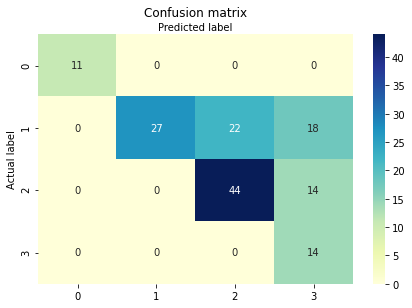

In [51]:
class_names=[0,1] # name  of classes 

fig, ax = plt.subplots() 

tick_marks = np.arange(len(class_names)) 

plt.xticks(tick_marks, class_names) 

plt.yticks(tick_marks, class_names) 

# create heatmap 

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 

ax.xaxis.set_label_position("top") 

plt.tight_layout() 

plt.title('Confusion matrix', y=1.1) 

plt.ylabel('Actual label') 

plt.xlabel('Predicted label')

# Support Vector Machine learning Model


In [52]:
SVM = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [53]:
SVM.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [54]:
SVM_pred = SVM.predict(X_test)

In [55]:
print("ACCURACY SCORE:\n")
print(accuracy_score(y_test, SVM_pred),"\n")
print("CLASSIFICATION REPORT:\n")
print(classification_report(y_test,SVM_pred))
print("CONFUSION MATRIX:\n")
print(confusion_matrix(y_test,SVM_pred))
SVM_Score = accuracy_score(y_test, SVM_pred)

ACCURACY SCORE:

1.0 

CLASSIFICATION REPORT:

              precision    recall  f1-score   support

        Mild       1.00      1.00      1.00        11
    Moderate       1.00      1.00      1.00        67
      Severe       1.00      1.00      1.00        58
 Very Severe       1.00      1.00      1.00        14

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

CONFUSION MATRIX:

[[11  0  0  0]
 [ 0 67  0  0]
 [ 0  0 58  0]
 [ 0  0  0 14]]


# Model evaluation using Confusion Matrix

In [56]:
cnf_matrix = metrics.confusion_matrix(y_test, SVM_pred)

# Visualizing Confusion Matrix using Heatmap

Text(0.5, 257.44, 'Predicted label')

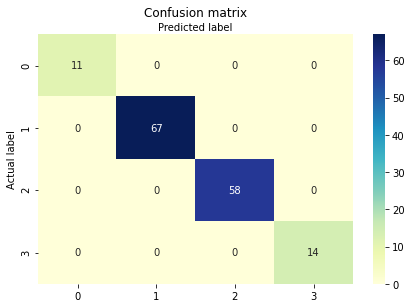

In [57]:
class_names=[0,1] # name  of classes 

fig, ax = plt.subplots() 

tick_marks = np.arange(len(class_names)) 

plt.xticks(tick_marks, class_names) 

plt.yticks(tick_marks, class_names) 

# create heatmap 

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 

ax.xaxis.set_label_position("top") 

plt.tight_layout() 

plt.title('Confusion matrix', y=1.1) 

plt.ylabel('Actual label') 

plt.xlabel('Predicted label')

# Comparing all the Prediction Algorithm Models

In [58]:
model = ["Random Forest","SVM","Logistics Regression","Gaussian NB ","KNN"]
score = [RT_score,SVM_Score,LR_Score,GN_Score,KNN_Score]

In [59]:
model_comparism = pd.DataFrame({"Model":model,"score":score})
model_comparism


,Model,score
0,Random Forest,1.000000
1,SVM,1.000000
2,Logistics Regression,0.713333
3,Gaussian NB,0.640000
4,KNN,1.000000


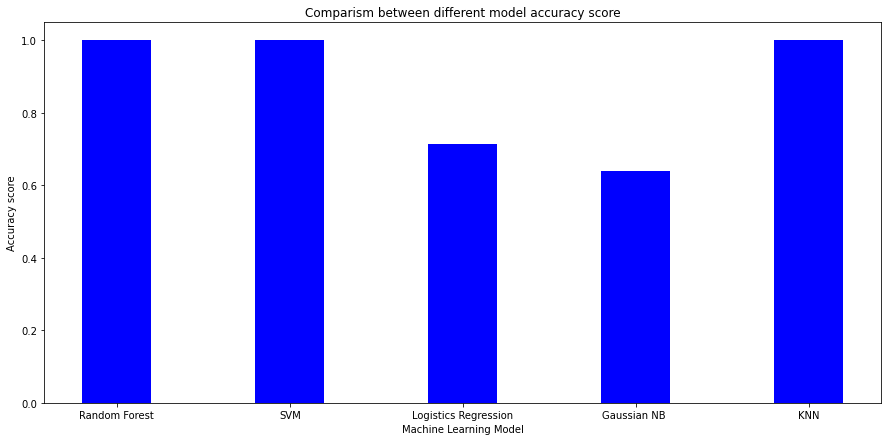

In [60]:
fig = plt.figure(figsize = (15, 7))
 
# creating the bar plot
plt.bar(model, score, color ='blue',
        width = 0.4)
 
plt.xlabel("Machine Learning Model")
plt.ylabel("Accuracy score")
plt.title("Comparism between different model accuracy score")
plt.show()

# Saving our progress using joblib

In [61]:
# save preprocessing objects and RF algorithm
filename = "Final_DT_model.sav"
joblib.dump(SVM, filename)


['Final_DT_model.sav']

In [62]:
#Taking inputs from users

In [63]:
print("NOTE:")
print ('''             0.00  means No symptoms
             0.25 means Mild
             0.50 means  Moderate 
             0.75 means Severe''' )

NOTE:
             0.00  means No symptoms
             0.25 means Mild
             0.50 means  Moderate 
             0.75 means Severe


In [ ]:
Fever = float(input("Enter the degree of Fever: "))
Headache = float(input("Enter the degree of Headache: "))
Nausea  = float(input("Enter the degree of Nausea: "))
Vomiting  = float(input("Enter the degree of Vomiting: "))
Jaundice  = float(input("Enter the degree of Jaundice : "))
Enlarged_Liver = float(input("Enter the degree of Enlarged Liver: "))
Joint_Pain  = float(input("Enter the degree of Joint Pain: "))
Body_Weakness  = float(input("Enter the degree of Body Weakness: "))
Dizziness  = float(input("Enter the degree of Dizziness: "))
Loss_of_Appetite  = float(input("Enter the degree of Loss of Appetite: "))
Mp  = float(input("Enter the degree of Mp : "))



In [ ]:
diagnosis = SVM.predict([[Fever,Headache,Nausea,Vomiting,Jaundice,Enlarged_Liver,Joint_Pain,Body_Weakness,Dizziness,Loss_of_Appetite,Mp  ]])

In [ ]:
print(diagnosis)